# Setting up the data

In [76]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

digits_data =  load_digits()

In [77]:
digits_data.keys()

dict_keys(['images', 'target', 'target_names', 'data', 'DESCR'])

In [78]:
labels = pd.Series(digits_data['target'])

In [79]:
data = pd.DataFrame(digits_data['data'])

In [80]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


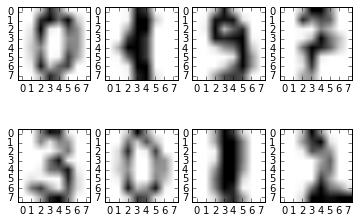

In [81]:
f, ax = plt.subplots(2, 4)

ax[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap = 'Greys')
ax[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap = 'Greys')
ax[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap = 'Greys')
ax[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap = 'Greys')

ax[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap = 'Greys')
ax[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap = 'Greys')
ax[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap = 'Greys')
ax[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap = 'Greys')

# Testing different models
## K-Nearest Neighbors:

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [83]:
def train_knn(NumNeighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = NumNeighbors)
    knn.fit(train_features, train_labels)
    return knn

In [84]:
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    return accuracy

In [85]:
def cross_validate(k):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        
        model = train_knn(k, train_features, train_labels)
        train_accuracy = test(model, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [86]:
one_accuracies = cross_validate(1)
one_accuracies[:5]

([1.0, 1.0, 1.0, 1.0],
 [0.9688888888888889,
  0.9599109131403119,
  0.9799554565701559,
  0.9621380846325167])

In [87]:
np.mean(one_accuracies)

0.9838616679039842

In [88]:
two_accuracies = cross_validate(2)
np.mean(two_accuracies)

0.9761632886430409

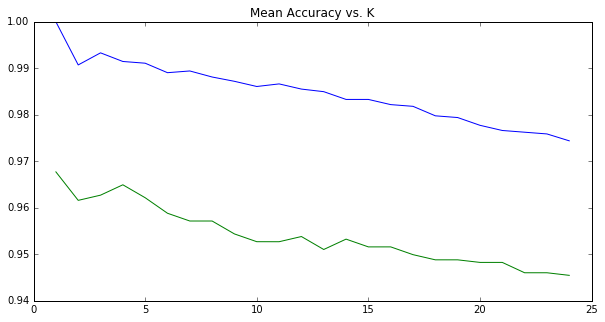

In [89]:
k_values = list(range(1,25))
k_train_accuracies = []
k_test_accuracies = []

for i in k_values:
    train_accuracy,test_accuracy = cross_validate(i)
    k_train_accuracies.append(np.mean(train_accuracy))
    k_test_accuracies.append(np.mean(test_accuracy))

plt.figure(figsize=(10,5))
plt.title('Mean Accuracy vs. K')
plt.plot(k_values,k_train_accuracies)
plt.plot(k_values,k_test_accuracies,c='green')

## 1 hidden layer neural network:

In [90]:
from sklearn.neural_network import MLPClassifier

In [91]:
def train_mlp(num_neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=num_neurons)
    mlp.fit(train_features, train_labels)
    return mlp

In [93]:
def cross_validate_mlp(num_neurons):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        
        model = train_mlp(num_neurons, train_features, train_labels)
        train_accuracy = test(model, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



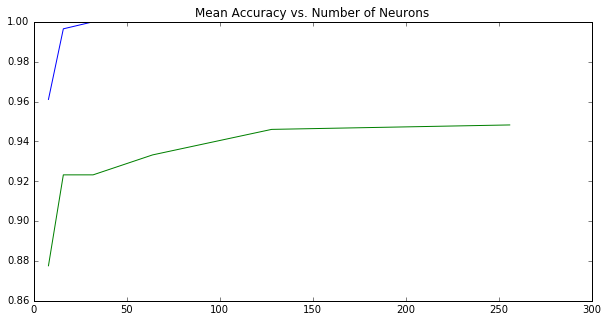

In [ ]:
nn_train_accuracies = []
nn_test_accuracies = []
num_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
for neuron in num_neurons:
    train_accuracies, test_accuracies = cross_validate_mlp(neuron)
    nn_train_accuracies.append(np.mean(train_accuracies))
    nn_test_accuracies.append(np.mean(test_accuracies))
    
plt.figure(figsize = (10,5))
plt.title('Mean Accuracy vs. Number of Neurons')
plt.plot(num_neurons, nn_train_accuracies)
plt.plot(num_neurons, nn_test_accuracies, c='green')

Increasing the number of neurons vastly helped increase the accuracy of the neural network, going from .88 to .95.  That said, it greatly increased the compute time of the model going from seconds to multiple minutes.  It also was no more accurate than the nearest neighbors model which was much less computationally expensive.  

I created a graph for both the test accuracy and training accuracy and you can see that there is up to a 9% different in accuracy between the test and training performance of the neural network, which means the model is slightly overfit.  You can see the max difference in accuracy for the nearest neighbor model is only 4% which means it is likely a better fit model.

## 2 hidden layer neural network:

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



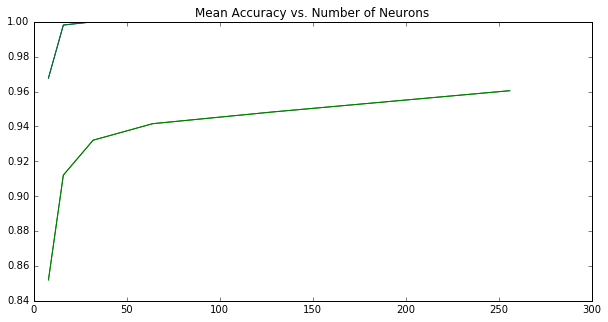

In [ ]:
nn_two_train_accuracies = []
nn_two_test_accuracies = []
num_neurons = [(8,8),(16,16),(32,32),(64,64),(128,128),(256,256)]
for neuron in num_neurons:
    train_accuracies, test_accuracies = cross_validate_mlp(neuron)
    nn_two_train_accuracies.append(np.mean(train_accuracies))
    nn_two_test_accuracies.append(np.mean(test_accuracies))
    
plt.figure(figsize = (10,5))
plt.title('Mean Accuracy vs. Number of Neurons')
plt.plot(num_neurons, nn_two_train_accuracies)
plt.plot(num_neurons, nn_two_test_accuracies, c='green')

The 2 hidden layer model was able to increase accuracy up to .96 at the max but was also required even longer to compute.  This puts the model about in line, or slightly above the nearest neighbors model, although it may not be worth the added compute time and may be worth looking at further improving the accuracy of the nearest neighbors model instead.

The 2 layer network, while slightly more overfit at the very low end, is only 4%  different with 256 neurons which is just as good as the nearest neighbors model.

## 3 hidden layer neural network:

In [97]:
def cross_validate_mlp_6(num_neurons):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        
        model = train_mlp(num_neurons, train_features, train_labels)
        train_accuracy = test_mlp(model, train_features, train_labels)
        test_accuracy = test_mlp(model, test_features, test_labels)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



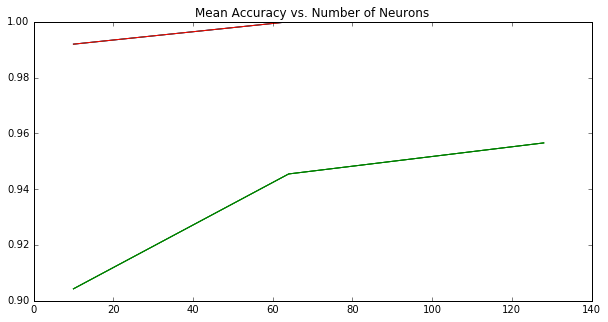

In [98]:
nn_three_train_accuracies = []
nn_three_test_accuracies = []
num_neurons = [(10,10,10),(64,64,64),(128,128,128)]
for neuron in num_neurons:
    train_accuracies, test_accuracies = cross_validate_mlp_6(neuron)
    nn_three_train_accuracies.append(np.mean(train_accuracies))
    nn_three_test_accuracies.append(np.mean(test_accuracies))
    
plt.figure(figsize = (10,5))
plt.title('Mean Accuracy vs. Number of Neurons')
plt.plot(num_neurons, nn_three_train_accuracies)
plt.plot(num_neurons, nn_three_test_accuracies, c='green')

Here, we were able to increase the low end slightly compared to a 2 layer NN and were also able to increase the accuracy of 64 and 128 neurons per layer by about 1%.  It seems as though the more layers and more neurons we add the model will continue to increase in accuracy.

## Decision tree model:

In [128]:
from sklearn.tree import DecisionTreeClassifier

def train_tree(min_samples, train_features, train_labels):
    tree = DecisionTreeClassifier(max_depth=15,min_samples_split=min_samples)
    tree.fit(train_features, train_labels)
    return tree

In [116]:
def cross_validate_tree(max_depth):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=10, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        
        model = train_tree(max_depth, train_features, train_labels)
        train_accuracy = test(model, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

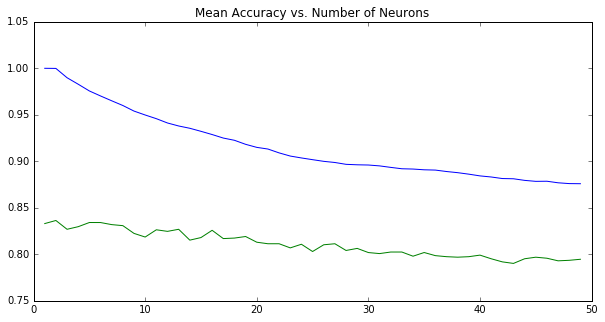

In [129]:
max_depth = list(range(1,50))
tree_train_accuracies = []
tree_test_accuracies = []

for i in max_depth:
    train_accuracies, test_accuracies = cross_validate_tree(i)
    tree_train_accuracies.append(np.mean(train_accuracies))
    tree_test_accuracies.append(np.mean(test_accuracies))
    
plt.figure(figsize = (10,5))
plt.title('Mean Accuracy vs. Number of Neurons')
plt.plot(max_depth, tree_train_accuracies)
plt.plot(max_depth, tree_test_accuracies, c='green')

With basic decision tree model we were unable to prevent the model from overfitting while also getting good accuracy.  One solution we will try next is using a random forest to see if that helps reduce the overfitting problem and increase the accuracy of the model.

## Random forest model:

In [152]:
from sklearn.ensemble import RandomForestClassifier

def train_forest(train_features, train_labels):
    forest = RandomForestClassifier(n_estimators=30,max_depth=15,min_samples_split=10)
    forest.fit(train_features, train_labels)
    return forest

In [156]:
def cross_validate_forest():
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=34, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features = data.loc[train_index]
        test_features = data.loc[test_index]
        
        train_labels = labels.loc[train_index]
        test_labels = labels.loc[test_index]
        
        model = train_forest(train_features, train_labels)
        train_accuracy = test(model, train_features, train_labels)
        test_accuracy = test(model, test_features, test_labels)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [158]:
forest_train_accuracies = []
forest_test_accuracies = []

train_accuracies, test_accuracies = cross_validate_forest()
forest_train_accuracies.append(np.mean(train_accuracies))
forest_test_accuracies.append(np.mean(test_accuracies))

print(forest_train_accuracies)
print(forest_test_accuracies)
#plt.figure(figsize = (10,5))
#plt.title('Mean Accuracy vs. Number of Neurons')
#plt.plot(max_depth, forest_train_accuracies)
#plt.plot(max_depth, forest_test_accuracies, c='green')

[0.9987858688071848]
[0.9615384615384616]


With the random forest model we were able to get our accuracy just as good as the nearest neighbors and 3 layer neural network.  We had a 96% accuracy using this which is the best we got for the other models as well.